### Joins

types

1. Inner Join - 
2. the most common one
3. When connecting two tables with INNER JOIN, only the rows from the tables that match on the joining columns will show up in the results
4. 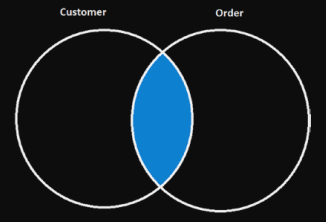
5. syntax

> > SELECT \<SELECT LIST\>  
> > <span style="color: var(--vscode-foreground);">FROM &lt;TABLE 1&gt; [INNER] JOIN &lt;TABLE 2&gt;<br></span><span style="color: var(--vscode-foreground);">ON &lt;TABLE1&gt;.&lt;COL1&gt;=&lt;TABLE2&gt;.&lt;COL2&gt;</span>

In [ ]:
SELECT H.SalesOrderID, H.OrderDate, H.TotalDue, D.SalesOrderDetailID, D.ProductID, D.OrderQty
FROM Sales.SalesOrderHeader AS H INNER JOIN Sales.SalesOrderDetail AS D
ON H.SalesOrderID=D.SalesOrderID

This query returns all the rows from table 1 that have one or more corresponding entries in the table two along with those entries from the table 2  
the column names of the two tables we are joining on dont need to have the same column name but they need to be of compatible data types

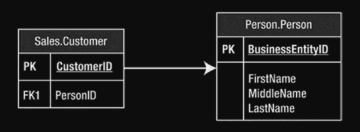

In [ ]:
SELECT C.CustomerID, C.PersonID, P.BusinessEntityID ,P.LastName, P.FirstName
FROM Sales.Customer AS C INNER JOIN Person.Person AS P
ON C.PersonID=P.BusinessEntityID

incorrect Joins 

- in the On clause if we write 1=1 which is always true we get as result all the rows from table 1 matched with all the rows from table 2 which is also called the cartesian product.

### INNER JOIN ON MULTIPLE COLUMNS
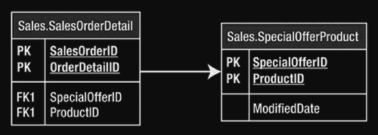
- typically used when the table we are joining on has a composite primary key and we have two foreign keys in the other table for the same
- IF WE USE ONLY ONE COLUMN WE WILL GET A CARTESIAN PRODUCT  because one column is not enough to uniquely identify the rows from table2
by using AND in the ON clause

In [ ]:
SELECT D.SalesOrderID, D.SalesOrderDetailID, O.ProductID, O.SpecialOfferID, O.ModifiedDate
FROM Sales.SalesOrderDetail AS D INNER JOIN Sales.SpecialOfferProduct AS O 
ON D.SpecialOfferID=O.SpecialOfferID AND D.ProductID=O.ProductID;